# Load csv file

Let's start with getting the datafiles loan.csv from kaggle.com

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To avoid DtypeWarning of column 47, mention low_memory=False
loan = pd.read_csv('loan.csv',low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Print the structure of the data, it seems because of 111 columns, info() is not displaying
print(loan.info(), "\n")
print(loan.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None 

(39717, 111)


In [4]:
# identify the unique number of id
print (len(loan.id.unique()))
print (len(loan.member_id.unique()))

39717
39717


In [5]:
# Summing up the missing values (column-wise) and displaying fraction of NaNs
# It seems we have so many columns with 100% missing values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

,0
id,0.0
member_id,0.0
loan_amnt,0.0
funded_amnt,0.0
funded_amnt_inv,0.0
...,...
tax_liens,0.1
tot_hi_cred_lim,100.0
total_bal_ex_mort,100.0
total_bc_limit,100.0


# Data Cleansing

 Fixing Rows and Columns: DataType changes and column values fixing

In [6]:
# Convert string object to date object for below columns
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format = '%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format = '%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format = '%b-%y')
loan['issue_d']
# Remove % and change the datatype to float
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype('float')

In [7]:
# It shows there is extra space in column value
print (list(loan['term'])[0:5])
# Remove the space
loan['term'] = loan['term'].str.strip()
# Remove the months word from column value and change the datatype
loan['term'] = loan['term'].str.split().str[0].astype(int)
# Rename the column name
loan.rename(columns={'term': 'term_months'}, inplace=True)

[' 36 months', ' 60 months', ' 36 months', ' 36 months', ' 60 months']


In [8]:
loan['issue_d']


,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
4,2011-12-01
...,...
39712,2007-07-01
39713,2007-07-01
39714,2007-07-01
39715,2007-07-01


# Missing values

Dropping unnecessary columns and columns with more % of missing values and filling missing values.

In [9]:
len(loan)*0.7

27801.899999999998

In [10]:
# Let's drop the columns with more than 30% missing values

thresh = len(loan)*0.7
thresh
loan.dropna(thresh = thresh, axis = 1, inplace = True)

In [11]:
# Print the shape of the dataframe
print(loan.shape)

# Summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2)

(39717, 53)


,0
id,0.00
member_id,0.00
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term_months,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00


Now, we have very less missing values for below columns:
emp_title, title,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths, pub_rec_bankruptcies and tax_liens

In [12]:
# Let's drop the below unnecessary columns by checking the DataFrame and Data Dictionary
loan = loan.drop(['id','member_id','pymnt_plan','emp_title','title','url','zip_code','last_credit_pull_d','out_prncp','out_prncp_inv','collections_12_mths_ex_med','earliest_cr_line','policy_code','initial_list_status','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1)

In [13]:
# Print the shape of the dataframe
print(loan.shape)

# Summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2)

(39717, 35)


,0
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term_months,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00
emp_length,2.71
home_ownership,0.00


In [14]:
loan['revol_util'] = loan['revol_util'].str.rstrip('%').astype('float')/100

Let's impute the missing values for below columns:
revol_util, last_pymnt_d, pub_rec_bankruptcies

In [15]:
loan.revol_util.describe()

,revol_util
count,39667.000000
mean,0.488322
std,0.283326
min,0.000000
25%,0.254000
50%,0.493000
75%,0.724000
max,0.999000


In [16]:
#Since there is no much spread of data and the difference between mean and median is very small, let's impute the missing values with mean
loan['revol_util'] = loan['revol_util'].fillna(loan['revol_util'].mean())
loan.revol_util

,revol_util
0,0.837
1,0.094
2,0.985
3,0.210
4,0.539
...,...
39712,0.131
39713,0.269
39714,0.194
39715,0.007


In [17]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

,0
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term_months,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00
emp_length,2.71
home_ownership,0.00


In [18]:
# summary stats of revol_util
loan.pub_rec_bankruptcies

,pub_rec_bankruptcies
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
39712,NaN
39713,NaN
39714,NaN
39715,NaN


These are integer type variables and has 0,1,2 values, so we cannot impute the missing values with mode - the most common occurring value.

In [19]:
loan['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0.0,37339
1.0,1674
2.0,7


In [20]:
# Convert to Category type
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].astype('category')

# Display frequency of each category
loan['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0.0,37339
1.0,1674
2.0,7


The most common value of pub_rec_bankruptcies is 0, so let's impute the missing values

In [65]:
# Impute the pub_rec_bankruptcies column with mode value
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies']==0)
loan['pub_rec_bankruptcies'].value_counts()

TypeError: Cannot setitem on a Categorical with a new category, set the categories first

In [22]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

,0
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term_months,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00
emp_length,2.71
home_ownership,0.00


In [23]:
loan['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0.0,37339
1.0,1674
2.0,7


In [24]:
# It shows that the missing values occurres only for 'Charged Off' loan types
print (loan[loan['last_pymnt_d'].isnull()]['loan_status'].unique())

# Number of missing values
print (loan.last_pymnt_d.isnull().sum())

['Charged Off']
71


In [25]:
#loan.loan_status.unique()
loan[loan['last_pymnt_d'].isnull() == True]

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,application_type,pub_rec_bankruptcies
26,15000,15000,8725.0,36,14.27,514.64,C,C2,9 years,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
2724,8000,8000,3975.0,36,14.65,275.96,C,C3,10+ years,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
3613,6400,6400,6400.0,60,18.25,163.39,D,D5,5 years,RENT,...,366.75,0.0,0.0,0.0,366.75,66.0150,NaT,0.0,INDIVIDUAL,0.0
3985,18000,18000,18000.0,60,19.03,467.23,E,E2,4 years,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
4206,1800,1800,1800.0,36,8.90,57.16,A,A5,9 years,RENT,...,1800.00,0.0,0.0,0.0,1800.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36185,20000,20000,13975.0,36,11.89,663.28,B,B4,10+ years,MORTGAGE,...,3139.36,0.0,0.0,0.0,4493.30,1381.4454,NaT,0.0,INDIVIDUAL,0.0
36206,7800,7800,7725.0,36,10.95,255.17,B,B1,< 1 year,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
36209,2000,2000,2000.0,36,16.00,70.32,E,E2,< 1 year,RENT,...,89.99,0.0,0.0,0.0,89.99,0.9000,NaT,0.0,INDIVIDUAL,0.0
36937,25000,25000,11625.0,36,13.79,851.89,C,C5,1 year,MORTGAGE,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0


Let's fill the last_pymnt_d date by analysing monthly installment and total_pymnt.
installment is the mothly installment who has to pay for taken loan
total_pymnt is the payments received to date for total amount funded

So, total_pymnt/installment gives the number of months the borrower has paid which means "last_pymnt_d"

In [26]:
# Create new derived metric to store the number of months the borrower has paid
loan['num_of_mnts_paid'] = round(loan['total_pymnt']/loan['installment'])
# Convert the datatype
loan['num_of_mnts_paid'] = loan['num_of_mnts_paid'].astype(int)
# Display subset data
loan.loc[loan['last_pymnt_d'].isnull(), ['funded_amnt','int_rate','installment','issue_d','last_pymnt_d','total_pymnt','num_of_mnts_paid']].head()

,funded_amnt,int_rate,installment,issue_d,last_pymnt_d,total_pymnt,num_of_mnts_paid
26,15000,14.27,514.64,2011-12-01,NaT,0.00,0
2724,8000,14.65,275.96,2011-11-01,NaT,0.00,0
3613,6400,18.25,163.39,2011-11-01,NaT,366.75,2
3985,18000,19.03,467.23,2011-11-01,NaT,0.00,0
4206,1800,8.90,57.16,2011-11-01,NaT,1800.00,31


In [27]:
loan['num_of_mnts_paid']

,num_of_mnts_paid
0,36
1,17
2,36
3,36
4,52
...,...
39712,36
39713,36
39714,34
39715,33


In [28]:
# Create a column to store the last payment date which is created based on 'issue_d','num_of_mnts_paid columns
# Add +1 to date_of_mnts_paid as monthly installment will start from issue_d+1
loan['date_of_mnts_paid'] = loan.loc[loan['num_of_mnts_paid']!=0, ['issue_d','num_of_mnts_paid']].apply(lambda x: x['issue_d'] + pd.DateOffset(months = x['num_of_mnts_paid']+1), axis=1)
loan['date_of_mnts_paid']

,date_of_mnts_paid
0,2015-01-01
1,2013-06-01
2,2015-01-01
3,2015-01-01
4,2016-05-01
...,...
39712,2010-08-01
39713,2010-08-01
39714,2010-06-01
39715,2010-05-01


In [29]:
# Fill the missing values of last_pymnt_d column from date_of_mnts_paid column
loan['last_pymnt_d'] = loan['last_pymnt_d'].fillna(loan['date_of_mnts_paid'])

# Drop the date_of_mnts_paid column which was created for filling missing values
loan = loan.drop(['date_of_mnts_paid'], axis=1)

# Get the list of observations which were not filled the missing values
loan.loc[loan['last_pymnt_d'].isnull(), ['term_months','funded_amnt','int_rate','installment','issue_d','last_pymnt_d','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','num_of_mnts_paid']]

,term_months,funded_amnt,int_rate,installment,issue_d,last_pymnt_d,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,num_of_mnts_paid
26,36,15000,14.27,514.64,2011-12-01,NaT,0.0,0.0,0.0,0.0,0
2724,36,8000,14.65,275.96,2011-11-01,NaT,0.0,0.0,0.0,0.0,0
3985,60,18000,19.03,467.23,2011-11-01,NaT,0.0,0.0,0.0,0.0,0
6967,60,2200,19.42,57.58,2011-09-01,NaT,0.0,0.0,0.0,0.0,0
8707,60,35000,13.99,814.21,2011-09-01,NaT,0.0,0.0,0.0,0.0,0
14220,36,3450,11.99,114.58,2011-05-01,NaT,0.0,0.0,0.0,0.0,0
14642,36,5000,16.49,177.00,2011-05-01,NaT,0.0,0.0,0.0,0.0,0
16301,36,10000,13.43,339.02,2011-04-01,NaT,0.0,0.0,0.0,0.0,0
16719,60,5550,13.06,126.46,2011-04-01,NaT,0.0,0.0,0.0,0.0,0
18316,36,10000,13.80,340.81,2011-03-01,NaT,0.0,0.0,0.0,0.0,0


As the total_pymnt value is 0, we can't find the number of months, also there is no info about other columns like 'total_pymnt_inv','total_rec_prncp','total_rec_int' and as this is very minimal observations let's drop these 16 observations.

In [30]:
# Drop the 16 observations of missing values of last_pymnt_d
loan = loan[pd.notnull(loan['last_pymnt_d'])]

# Summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2)

,0
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term_months,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00
emp_length,2.71
home_ownership,0.00


In [31]:
# Print the unique values of home_ownership
print (loan.home_ownership.unique())
# Check the number of loans by home_ownership
print (loan.home_ownership.value_counts())

# Replace the 'NONE' with 'RENT'(mode of home_ownership column)
loan['home_ownership'] = loan.home_ownership.str.replace('NONE','RENT')


['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
home_ownership
RENT        18887
MORTGAGE    17657
OWN          3056
OTHER          98
NONE            3
Name: count, dtype: int64


<ipython-input-31-e3c5a473a4db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['home_ownership'] = loan.home_ownership.str.replace('NONE','RENT')


In [32]:
print (loan.home_ownership.value_counts())


home_ownership
RENT        18890
MORTGAGE    17657
OWN          3056
OTHER          98
Name: count, dtype: int64


In [33]:
loan['emp_length']

,emp_length
0,10+ years
1,< 1 year
2,10+ years
3,10+ years
4,1 year
...,...
39712,4 years
39713,3 years
39714,< 1 year
39715,< 1 year


In [34]:
# Print the unique values of emp_length
print (loan.emp_length.unique())
# Check the number of loans by emp_length
print (loan.emp_length.value_counts())

# Replace the 'n/a' with '10+ years'(mode of emp_length column)
loan['emp_length'] = loan.emp_length.str.replace('< 1 year','0')
loan['emp_length'] = loan.emp_length.str.replace(' years','')
loan['emp_length'] = loan.emp_length.str.replace(' year','')
loan['emp_length'] = loan.emp_length.str.replace('+','')
loan['emp_length'] = loan.emp_length.str.replace('n/a','10')
# Convert datatype
loan['emp_length'] = pd.to_numeric(loan['emp_length'])
loan['emp_length']

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
emp_length
10+ years    8877
< 1 year     4580
2 years      4388
3 years      4093
4 years      3433
5 years      3281
1 year       3238
6 years      2229
7 years      1773
8 years      1478
9 years      1257
Name: count, dtype: int64


<ipython-input-34-0670aa5b7ebd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['emp_length'] = loan.emp_length.str.replace('< 1 year','0')
<ipython-input-34-0670aa5b7ebd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['emp_length'] = loan.emp_length.str.replace(' years','')
<ipython-input-34-0670aa5b7ebd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,emp_length
0,10.0
1,0.0
2,10.0
3,10.0
4,1.0
...,...
39712,4.0
39713,3.0
39714,0.0
39715,0.0



# Exract Type-driven Metrics


In [35]:
# Extract the month, year from issue_d column
loan['issued_month'] = loan['issue_d'].dt.month
loan['issued_year'] = loan['issue_d'].dt.year

In [36]:
loan['issued_year']

,issued_year
0,2011
1,2011
2,2011
3,2011
4,2011
...,...
39712,2007
39713,2007
39714,2007
39715,2007


In [37]:
# Derived Metric: Calculate the Return of Investment(ROI) by (total_pymnt-collection_recovery_fee/funded_amnt)-1
loan['roi'] = round(((loan['total_pymnt']-loan['collection_recovery_fee'])/loan['funded_amnt'])-1, 2)
loan['roi']

,roi
0,0.17
1,-0.60
2,0.25
3,0.22
4,0.17
...,...
39712,0.13
39713,0.17
39714,0.05
39715,0.03


In [38]:
# For further analysis, let's filter the loan data by ignoring loan_status of 'Current', since these are currently running loans.
loan = loan[loan['loan_status']!='Current']

loan.shape


(38561, 39)

Text(0, 0.5, 'Number of Loans issued')

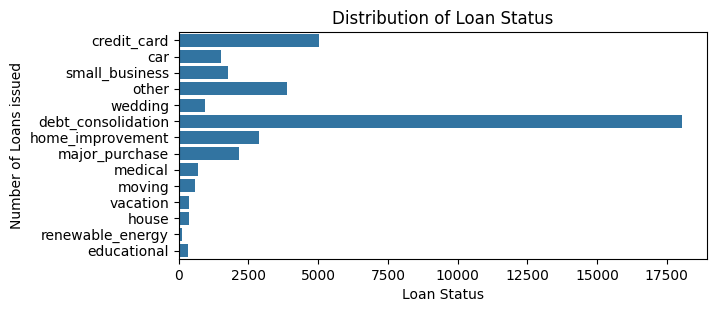

In [39]:
plt.figure(figsize=(15,10))

#plt.figure(1)

# Distribution of Loans by Status
plt.subplot(3,2,1)
sns.countplot(y='purpose', data=loan)
plt.title('Distribution of Loan Status')
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans issued")



# Univariate Analysis on Unordered Categorical Variables


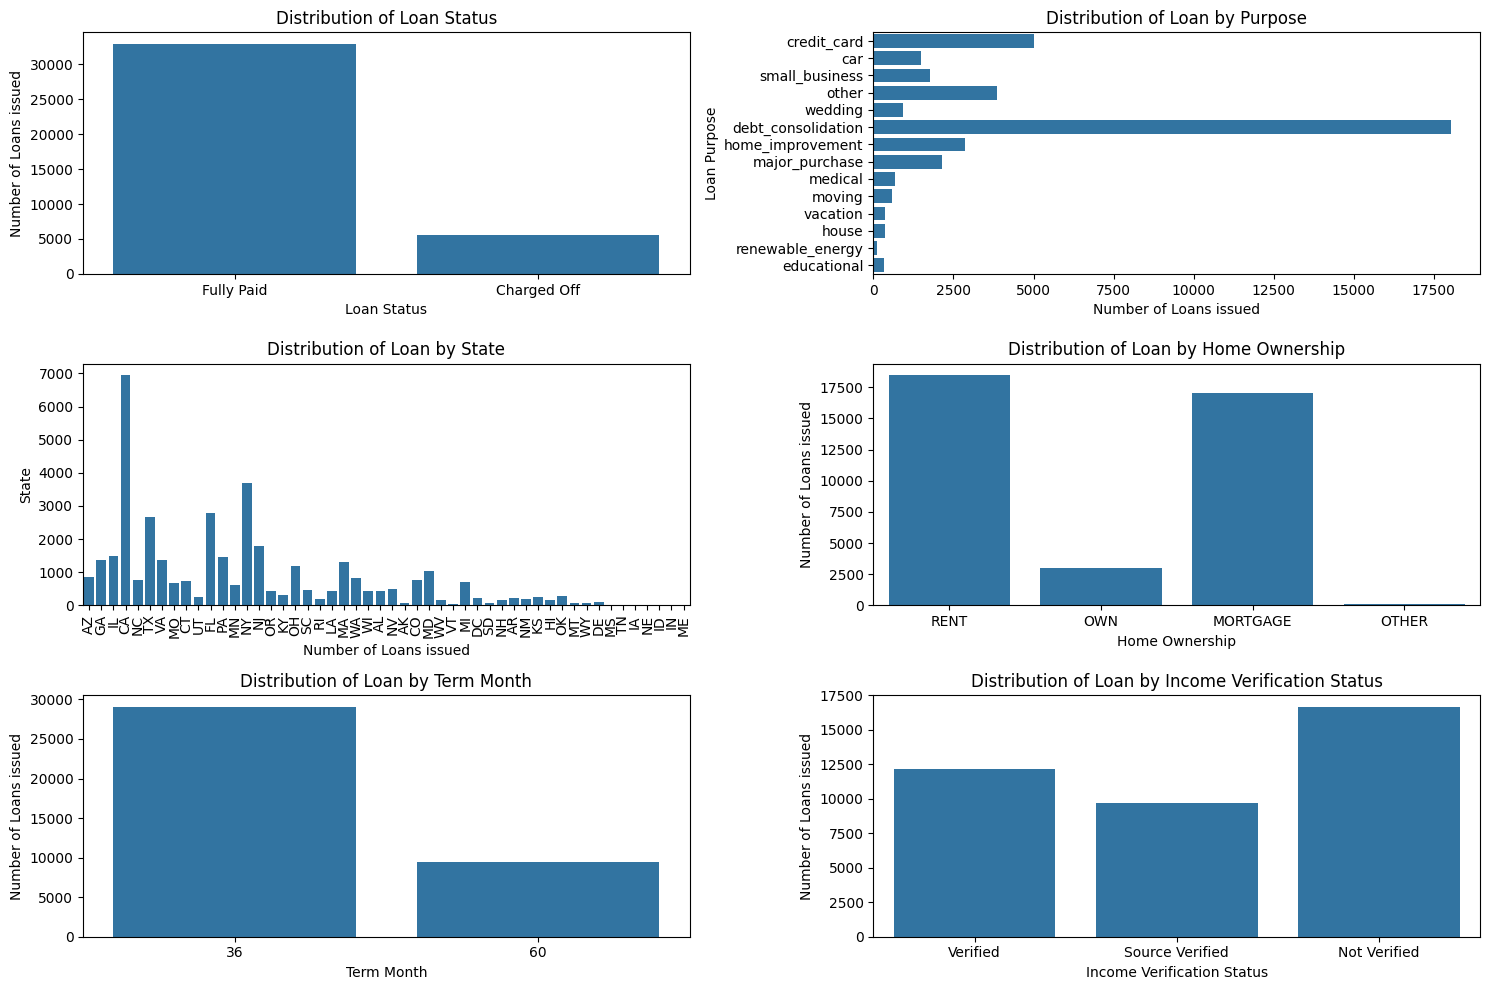

In [40]:
# Univariate Analysis on Unordered Categorical variables
plt.figure(figsize=(15,10))

plt.figure(1)

# Distribution of Loans by Status
plt.subplot(3,2,1)
sns.countplot(x='loan_status', data=loan)
plt.title('Distribution of Loan Status')
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Purpose
plt.subplot(3,2,2)
sns.countplot(y='purpose', data=loan)
plt.title('Distribution of Loan by Purpose')
plt.xlabel("Number of Loans issued")
plt.ylabel("Loan Purpose")

# Distribution of Loan by State
plt.subplot(3,2,3)
sns.countplot(x='addr_state', data=loan)
plt.xticks(rotation=90)

plt.title('Distribution of Loan by State')
plt.xlabel("Number of Loans issued")
plt.ylabel("State")
# To rotate axis text
plt.xticks(rotation=90)

# Distribution of Loan by Home Ownership
plt.subplot(3,2,4)
sns.countplot(x='home_ownership', data=loan)
plt.title('Distribution of Loan by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Term Month
plt.subplot(3,2,5)
sns.countplot(x='term_months', data=loan)
plt.title('Distribution of Loan by Term Month')
plt.xlabel("Term Month")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Income Verification Status
plt.subplot(3,2,6)
sns.countplot(x='verification_status', data=loan)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

Observation:

1) From this dataset, we have more observations(85%) from "Fully Paid" status.

2) There are more loan applicant's with purpose of debt consolidation.

3) There are more loan applicant's from California state.

4) Most of the loan applicant's are rented and mortgage.

5) There the more number of loan with 36 month term.

6) There the more number of loan which were not verified the annual income.

Borrowers with own house and want to consolidate debt are not at much risk, but borrower with rent,mortgage and want to consolidate debt are at high risk applicants.


# Univariate Analysis on Ordered Categorical Variables


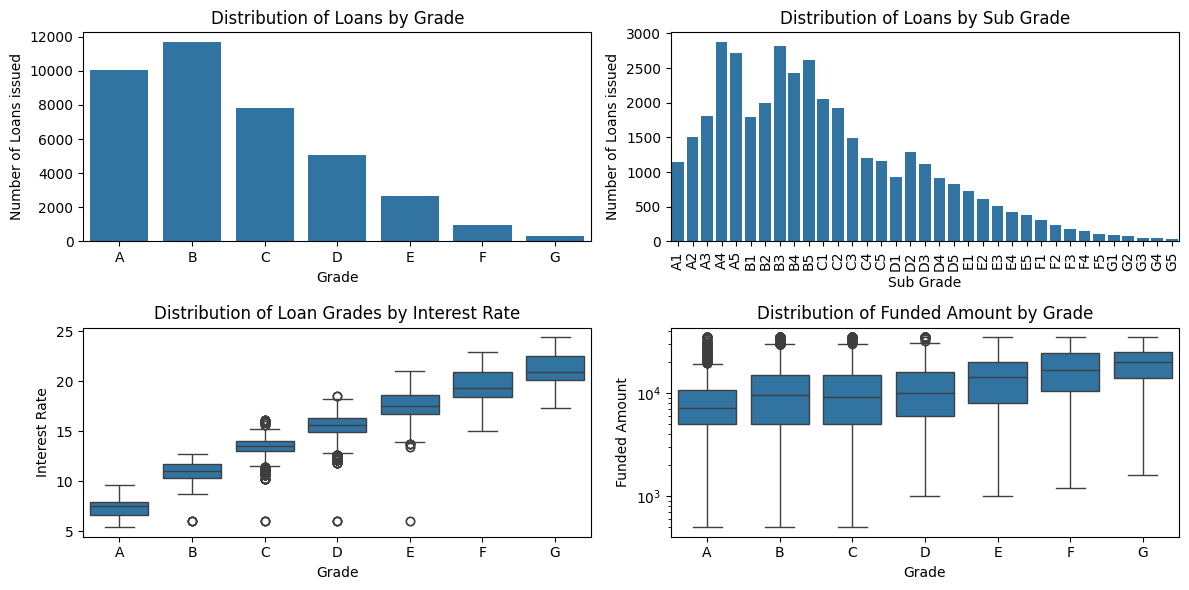

In [41]:
# Distribution of Loans by Grade and Sub-Grade
plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,2,1)
sns.countplot( x="grade", data=loan,order = np.sort(loan['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(2,2,2)
sns.countplot( x="sub_grade", data=loan, order = np.sort(loan['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)


# Distribution of Loan Grades by Interest Rate
plt.subplot(2,2,3)
sns.boxplot(x="grade", y="int_rate", data=loan, order = np.sort(loan['grade'].unique()))
plt.title('Distribution of Loan Grades by Interest Rate')
plt.xlabel("Grade")
plt.ylabel("Interest Rate")

# Distribution of Funded Amount by Grade
plt.subplot(2,2,4)
sns.boxplot(x="grade", y="funded_amnt" , data=loan, order = np.sort(loan['grade'].unique()))
plt.title('Distribution of Funded Amount by Grade')
plt.xlabel("Grade")
plt.ylabel("Funded Amount")
plt.yscale('log')

# To adjust spacing between subplots
plt.tight_layout()

plt.show()

Observations:

1) From above plots, it shows that more number of loans were from B,A and C grade's and least from G grade.

2) From Sub grades A4, B3 have more number of loans.

3) From 3rd plot, it shows that A,B,C grade loans have less interest rate and E,F,G have high interest rate. From 1st, 2nd plots there are more number of loans from A,B,C grade(granularity check from sub-grades). It might be the reason that the loan applicant's from A,B,C grades have better credit score and lower risk.

4) From 4rt plot, it shows that there are high funded amount in A,B,C and D grades as the applicant's from these grades have better credit score and lower risk.


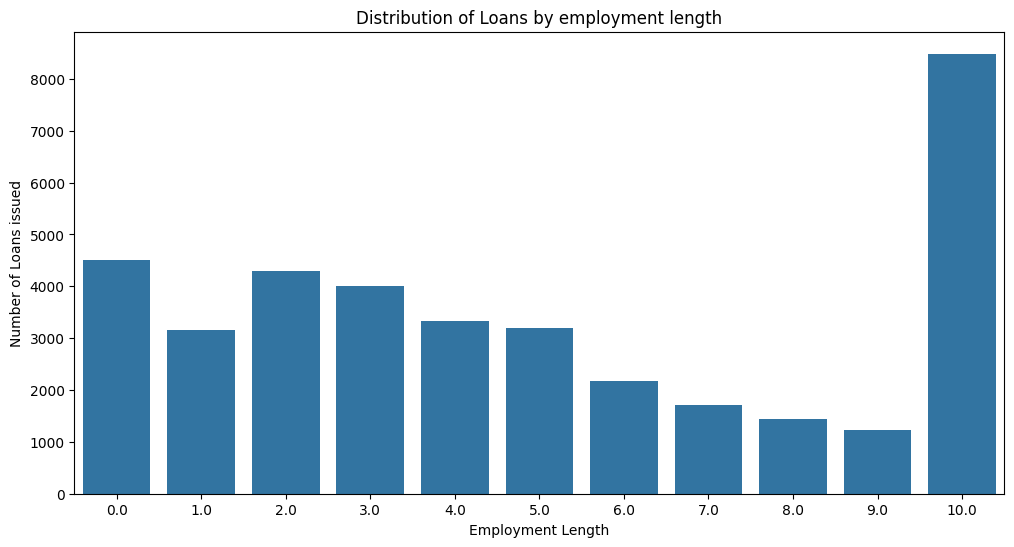

In [42]:
# Distribution of Loans by employment length
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=loan)
plt.title('Distribution of Loans by employment length')
plt.xlabel("Employment Length")
plt.ylabel("Number of Loans issued")
plt.show()

Observation:
1) The majority of borrowers have been employed for at least 10 years.

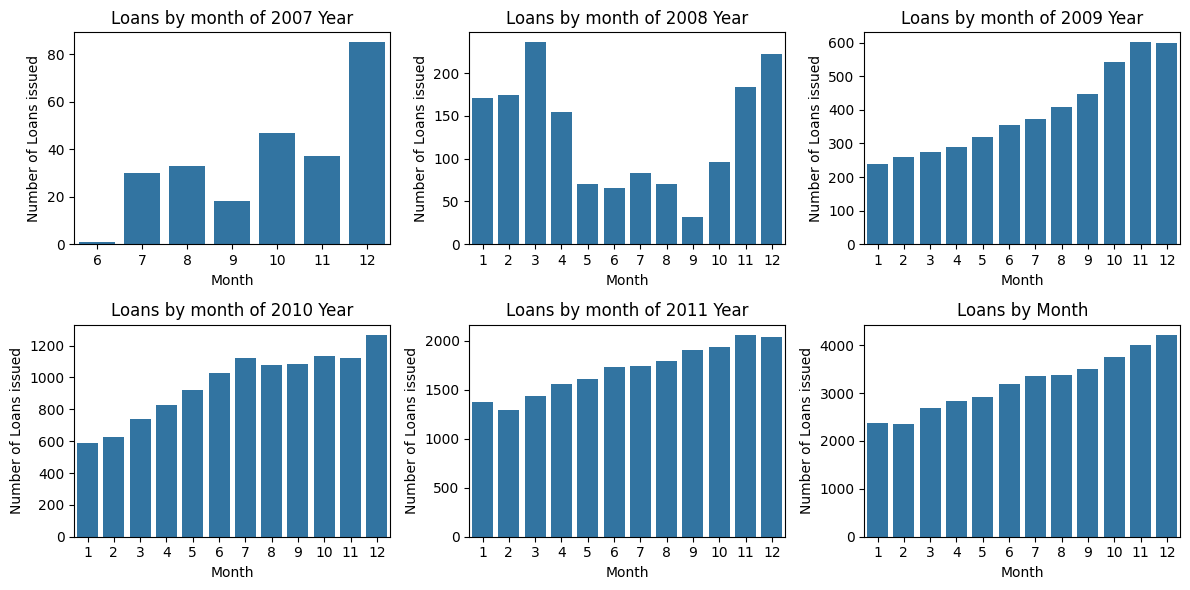

In [43]:
# Number of loans issued (by year/month)
plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,3,1)
sns.countplot(x="issued_month", data=loan[loan['issued_year']==2007])
plt.title("Loans by month of 2007 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,2)
sns.countplot( x="issued_month", data=loan[loan['issued_year']==2008])
plt.title("Loans by month of 2008 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,3)
sns.countplot( x="issued_month", data=loan[loan['issued_year']==2009])
plt.title("Loans by month of 2009 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,4)
sns.countplot( x="issued_month", data=loan[loan['issued_year']==2010])
plt.title("Loans by month of 2010 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,5)
sns.countplot( x="issued_month", data=loan[loan['issued_year']==2011])
plt.title("Loans by month of 2011 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,6)
sns.countplot( x="issued_month", data=loan)
plt.title("Loans by Month")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

Observations:

1) From above plots, it shows that more number of loans were issued in 11,12(November, December) months, the reasons could be Festivals(Thanks giving Day, Christmas and New Year).

2) In 2008 Year, there was huge spike in 3rd Month.

3) Number of loans issued increased steadily with slight descrease in 2008 year.


# Univariate Analysis on Quantitative Variables


In [44]:
# Let's print descriptive data summary for all numerical columns
print (loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment','annual_inc', 'dti', 'delinq_2yrs','emp_length', 'roi']].describe())
print ("\n")
print (loan[['inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_amnt', 'application_type','pub_rec_bankruptcies', 'num_of_mnts_paid']].describe())

          loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  38561.000000  38561.000000     38561.000000  38561.000000   
mean   11047.019009  10783.942973     10222.833415     11.931173   
std     7347.682257   7089.407652      7022.152492      3.691412   
min      500.000000    500.000000         0.000000      5.420000   
25%     5300.000000   5200.000000      5000.000000      8.940000   
50%     9600.000000   9550.000000      8741.042410     11.710000   
75%    15000.000000  15000.000000     14000.000000     14.380000   
max    35000.000000  35000.000000     35000.000000     24.400000   

        installment    annual_inc           dti   delinq_2yrs    emp_length  \
count  38561.000000  3.856100e+04  38561.000000  38561.000000  37529.000000   
mean     322.458554  6.878709e+04     13.271920      0.146573      4.941299   
std      208.618464  6.422929e+04      6.673218      0.491936      3.557075   
min       15.690000  4.000000e+03      0.000000      0.000000      0.00

It seems all are fine except annual income(annual_inc). Let's analyse it separatly.

In [45]:
# It shows that the very high annual income exists after 75th percentile
loan['annual_inc'].describe().apply(lambda x: format(x, 'f'))

,annual_inc
count,38561.000000
mean,68787.090861
std,64229.287828
min,4000.000000
25%,40000.000000
50%,58880.000000
75%,82000.000000
max,6000000.000000


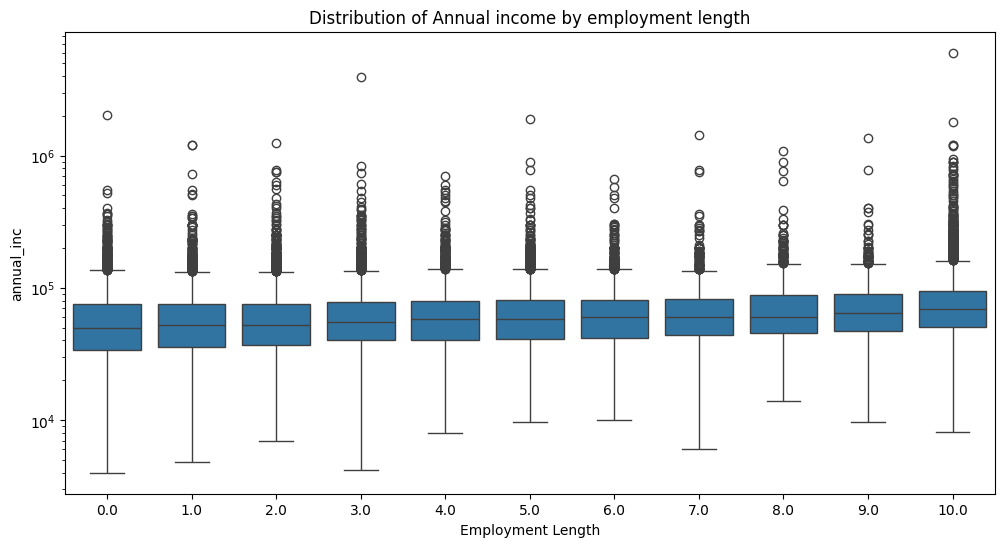

In [46]:
# Distribution of Annual income by employment length
plt.figure(figsize=(12,6))
sns.boxplot(x="emp_length", y="annual_inc" , data=loan)
plt.title('Distribution of Annual income by employment length')
plt.xlabel("Employment Length")
plt.ylabel("annual_inc")
plt.yscale('log')
plt.show()

Observations:

1) Almost all 'employment length' category has same level of 25th, 50th(Median) and 75th precentile's.


2) It clearly shows that there are high annual income values in almost all 'employment length' category. We can treat these as outliers.

<ipython-input-47-219a02f849e1>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan["dti"])
<ipython-input-47-219a02f849e1>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan["revol_util"])
<ipython-input-47-219a02f849e1>:16: UserWarning: 

`distplot` is a deprecated function and will be r

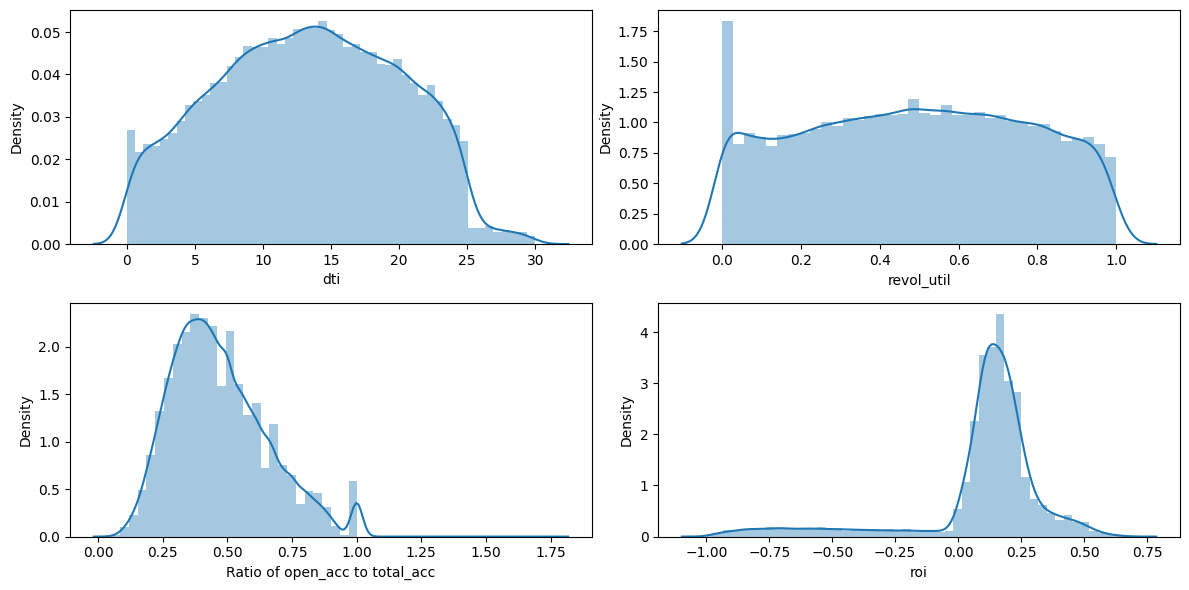

In [47]:
# Frequency distributions
plt.figure(figsize=(12,6))

plt.figure(1)

# Frequency distribution of DTI
plt.subplot(2,2,1)
sns.distplot(loan["dti"])

# Frequency distribution of revolving credit uilization
plt.subplot(2,2,2)
sns.distplot(loan["revol_util"])

# Frequency distribution of ration of open_acc to total_acc
plt.subplot(2,2,3)
sns.distplot(loan["open_acc"]/loan["total_acc"])
plt.xlabel("Ratio of open_acc to total_acc")

# Frequency distribution of ration of open_acc to total_acc
plt.subplot(2,2,4)
sns.distplot(loan["roi"])


# To adjust spacing between subplots
plt.tight_layout()
plt.show()


Observations:

1) The average debt-to-income ratio is 13%. There doesn’t seem to be much skew, considering the median is so close to the mean.

2) The mean of revolving credit utilization is 49%,  which means the average borrower is using most of their revolving credit at a time when they are seeking the loan. Also, there is large spread of data but not much skewed.

3) The percentage of open accounts to total accounts seems left skewed.

4) Negative ROI indicates defaulted loans while almost all of the loans with positive ROI were fully paid.

# Summary of Univariate Observations:

1) There are 40 variables (so far) with 39717 rows.

2) Number of loans issued increased steadily by every year with a slight decrease in 2008.

3) Of settled loans, 83% were Fully Paid and 14% were Charged Off.

4) Borrowers with own house and want to consolidate debt are not at much risk, but borrower with rent,mortgage and want to  consolidate debt are at high risk applicants.

5) Majority of loans were from A, B, and C grade.

6) There is an inverse relationship between interest rate and loan grade - lower grades have higher interest rate.



# Bivariate Analysis on Continuous Variables


In [49]:
# Correlation Plot
cor = loan.corr()
round(cor,3)
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

ValueError: could not convert string to float: 'B'

From above correlation plot it show:

1) There are no highly negative correlation between columns.

2) There are some highly correlated columns at top and middle left block.

3) There is 0.45 correlation between term_months and interest rate(int_rate).

4) There is 0.47 correlation between revol_util and interest rate(int_rate).

5) There is no much correlation between Annual Income, DTI with other columns.

Let's check the bivariate distribution for below columns:
1) Interest rates vs ROI
2) Annual income vs ROI

<Figure size 1200x600 with 0 Axes>

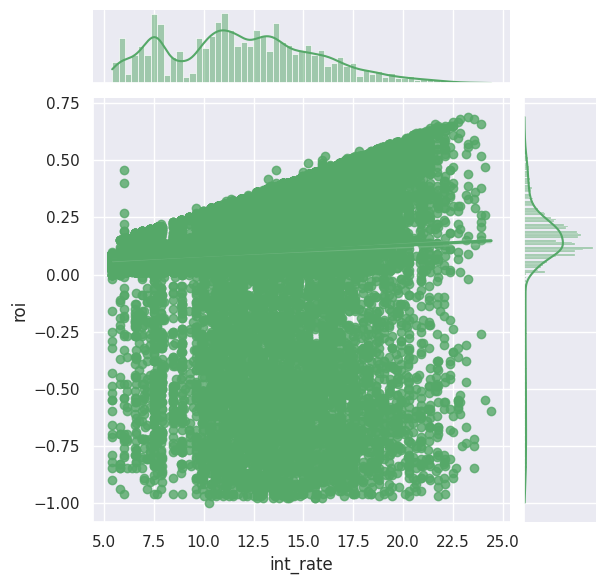

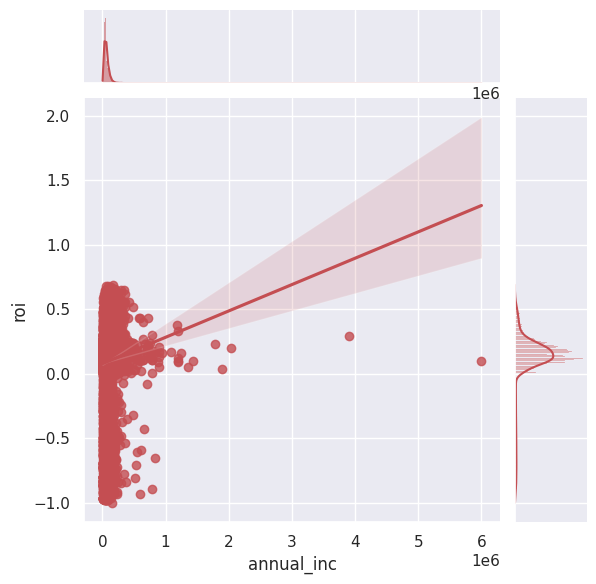

In [50]:
# ROI vs Interest Rate and Annual Income
plt.figure(figsize=(12,6))

sns.set(style="darkgrid", color_codes=True)

sns.jointplot(x="int_rate", y="roi", data=loan, kind="reg", color="g")

sns.jointplot(x="annual_inc", y="roi", data=loan, kind="reg", color="r")

plt.show()

Observations:

1) There was a positive correlation between interest rates and ROI for borrowers who paid their loans, but for those who didn’t pay the ROI was negative and it shows no correlation with interest rates.

2) Borrowers with higher income has positive ROI while borrowers with lower income has negative ROI.

<Figure size 2000x1500 with 0 Axes>

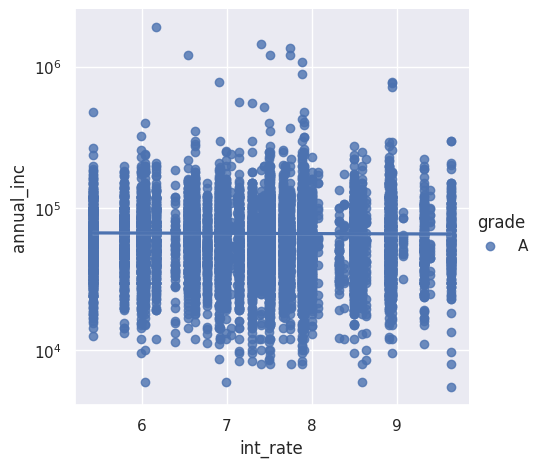

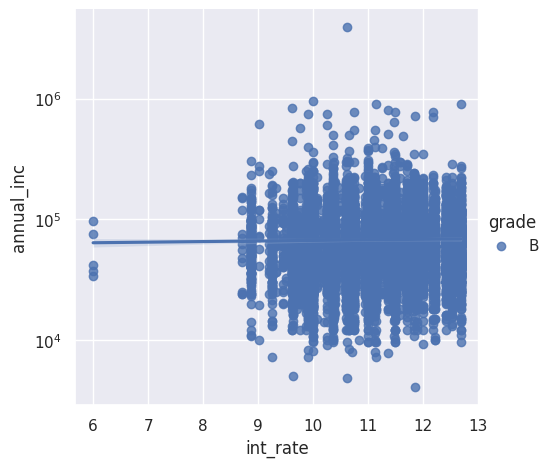

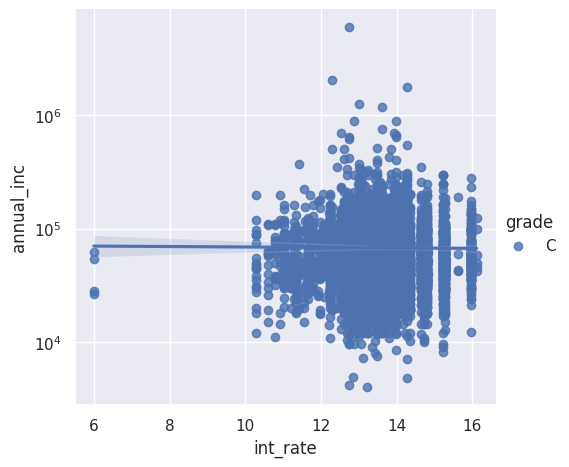

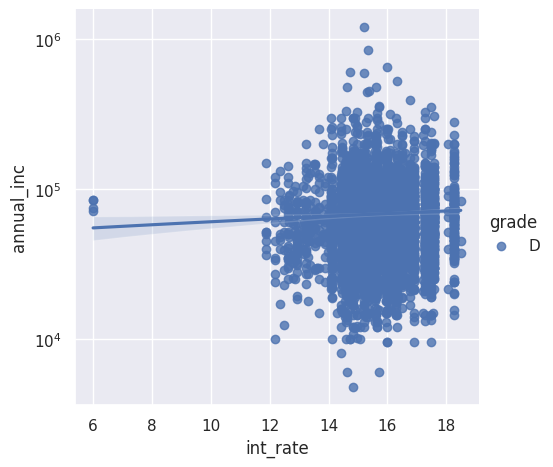

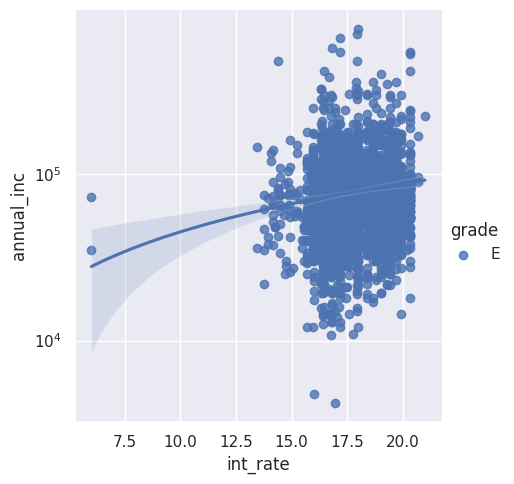

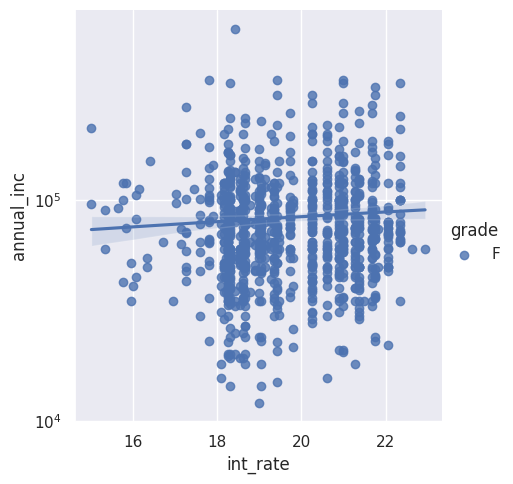

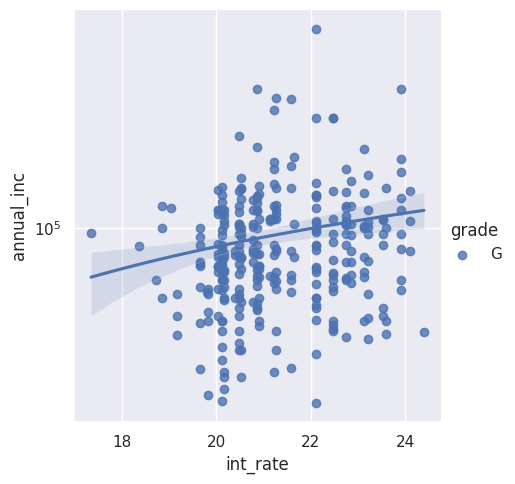

In [51]:
# Annual Income Vs Interest Rate distribution by each grade
plt.figure(figsize=(20,15))

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='A'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='B'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='C'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='D'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='E'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='F'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='G'], hue='grade')
plt.yscale('log')

plt.show()

Observations:

1) Grade A has borrowers with interest rate between 5-10%.

2) Grade B has borrowers with interest rate between 8-13%, but few are there with near 6%.

3) Grade C has borrowers with interest rate between 10-16%, but few are there with near 6%.

4) Grade D has borrowers with interest rate between 12-18%, but few are there with near 6%.

5) Grade E has borrowers with interest rate between 14-20%, but few are there with near 6%.

6) Grade F has borrowers with interest rate between 15-23%.

7) Grade G has borrowers with interest rate between 17-24%.

It is evident that the interest rate range changes from one grade to other, and also there are few borrowers with near 6% falling in B,C,D and E grade's.

<Figure size 2000x1500 with 0 Axes>

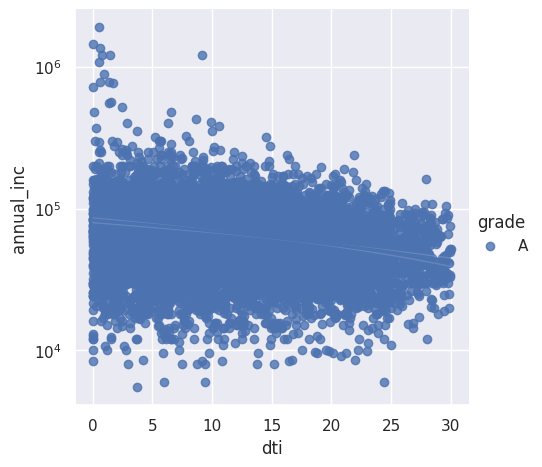

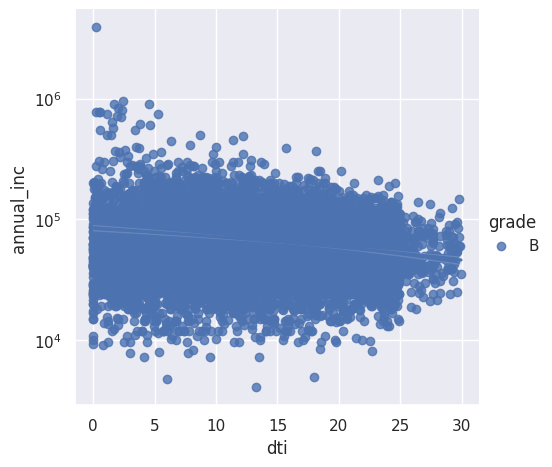

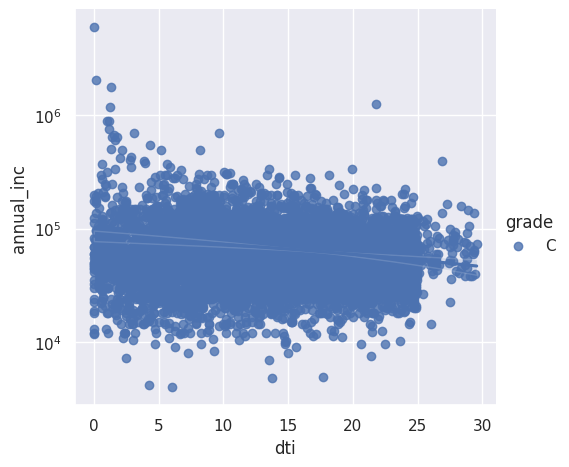

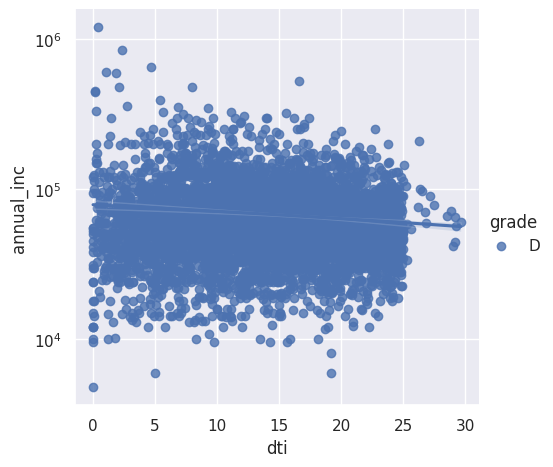

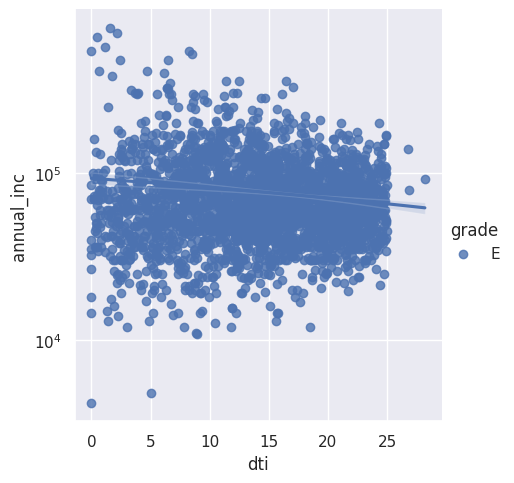

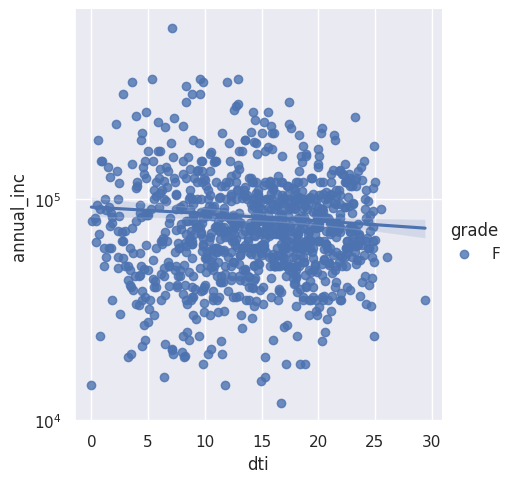

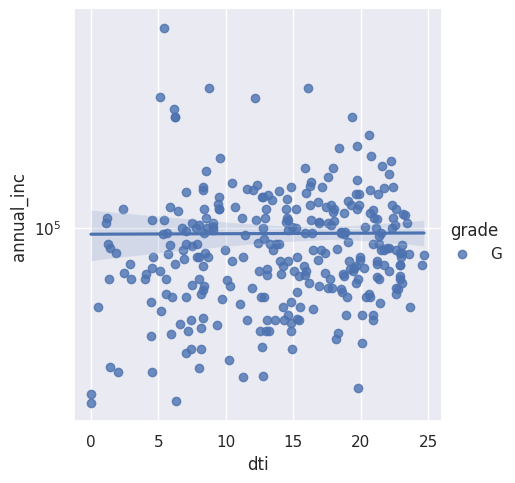

In [52]:
# Annual Income Vs DTI distribution by each grade
plt.figure(figsize=(20,15))

sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='A'], hue='grade')
plt.yscale('log')


sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='B'], hue='grade')
plt.yscale('log')


sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='C'], hue='grade')
plt.yscale('log')


sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='D'], hue='grade')
plt.yscale('log')

sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='E'], hue='grade')
plt.yscale('log')

sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='F'], hue='grade')
plt.yscale('log')

sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='G'], hue='grade')
plt.yscale('log')

plt.show()

Observations:

1) It seems in A,B,C grades the data is spreaded and have DTI from 0-30.

2) Lower number of borrowers from 25-30 DTI in D,E grades.

3) Grade G has maximum 25 DTI.

It seems there is no DTI range constraint from one grade to other similar to interest rate which we have seen above.

# Bivariate Analysis on Categorical Variables




# ROI Bivariate Distribution plots


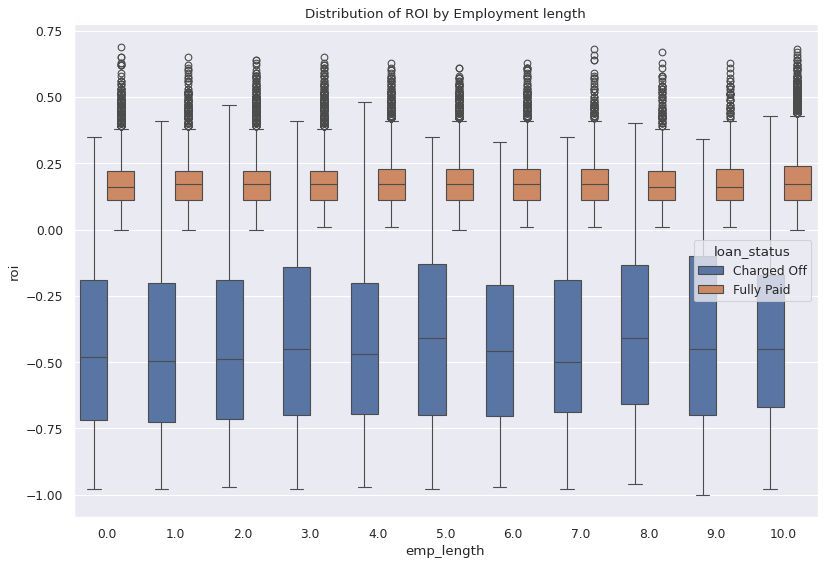

In [53]:
# ROI vs Employment length by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="emp_length", y='roi', hue='loan_status',  data=loan)
plt.title('Distribution of ROI by Employment length')
plt.show()

Observations:

1) From fully_paid status loan, almost all employment length have same mean ROI.

2) From Charged_off status loan 1 years, 2 years and 7 years have low mean ROI.

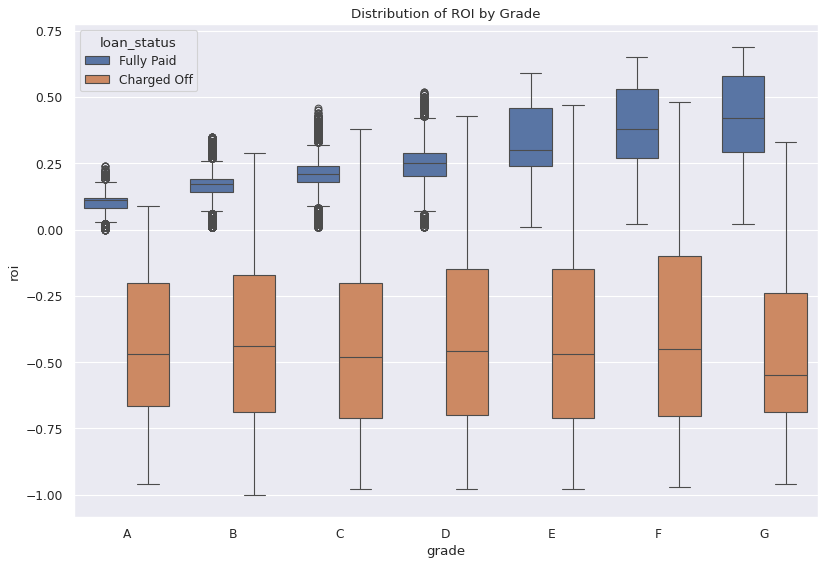

In [54]:
# ROI vs Grade by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="grade", y="roi" ,hue='loan_status', data=loan, order = np.sort(loan['grade'].unique()))
plt.title('Distribution of ROI by Grade')
plt.show()

Observations:

1) From fully_paid status loan, grades E,F,G have high mean ROI, this might be high interest rates.

2) From Charged_off status loan, grade G has low mean ROI.

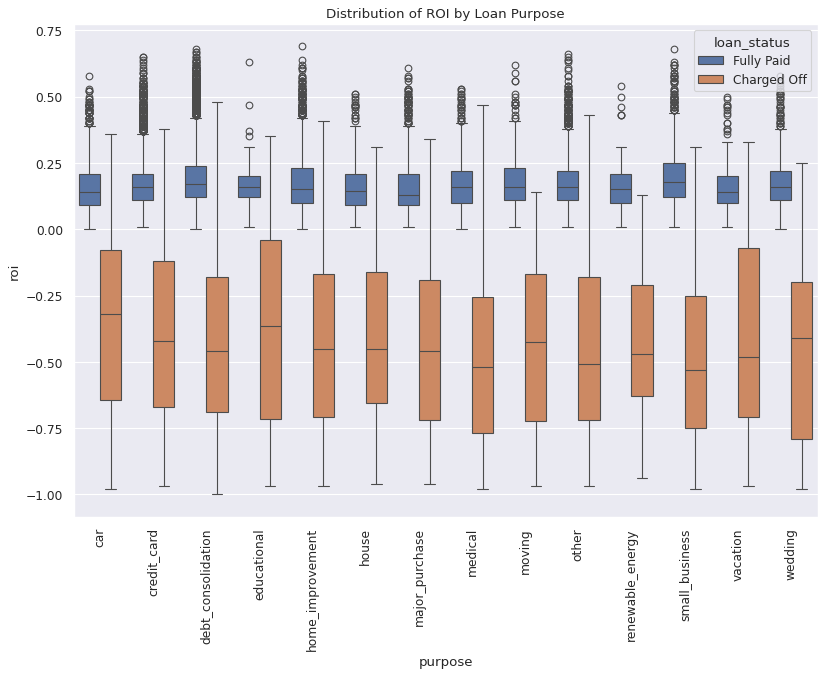

In [55]:
# ROI vs Loan Purpose by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="purpose", y='roi', hue='loan_status', data=loan, order=np.sort(loan['purpose'].unique()))
plt.title('Distribution of ROI by Loan Purpose')
# To rotate axis text
plt.xticks(rotation=90)
plt.show()


Observations:

1) From fully_paid status loan, almost all categories have nearby mean ROI.

2) From Charged_off status loan, small_business, other and medical have low mean ROI.

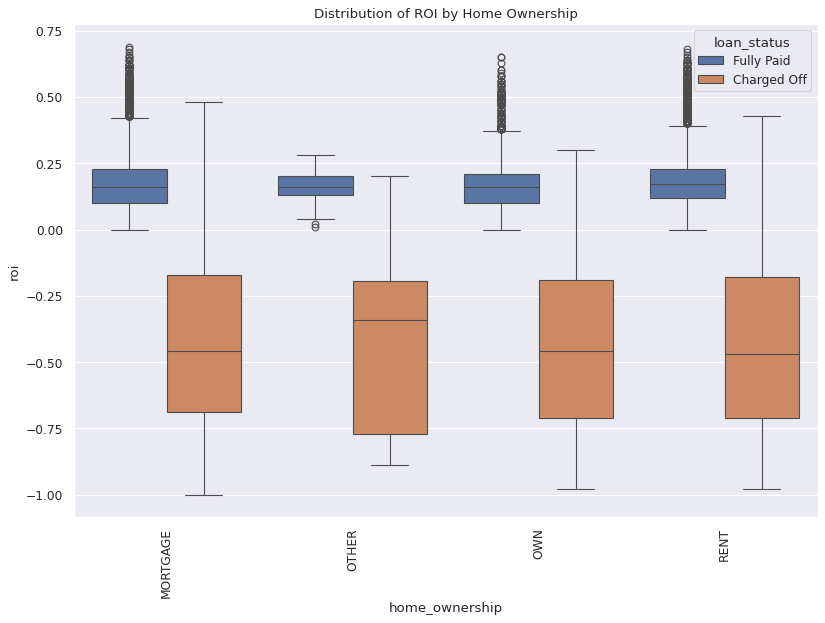

In [56]:
# ROI vs Home Ownership by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="home_ownership", y='roi', hue='loan_status', data=loan, order=np.sort(loan['home_ownership'].unique()))
plt.title('Distribution of ROI by Home Ownership')
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

Observations:
From Charged_off status loan, Rent and Mortgage have low mean ROI.




# Interest Rate Bivariate Distribution Plots


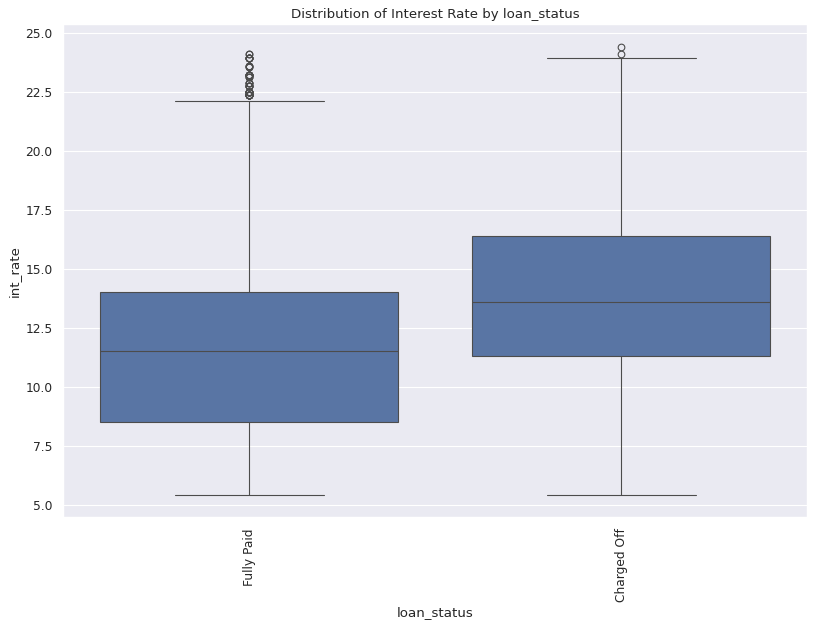

In [57]:
# Interest Rate vs loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="loan_status", y='int_rate', data=loan)
plt.title('Distribution of Interest Rate by loan_status')
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

Observations:
It shows that the interest rate is more from defaulters.

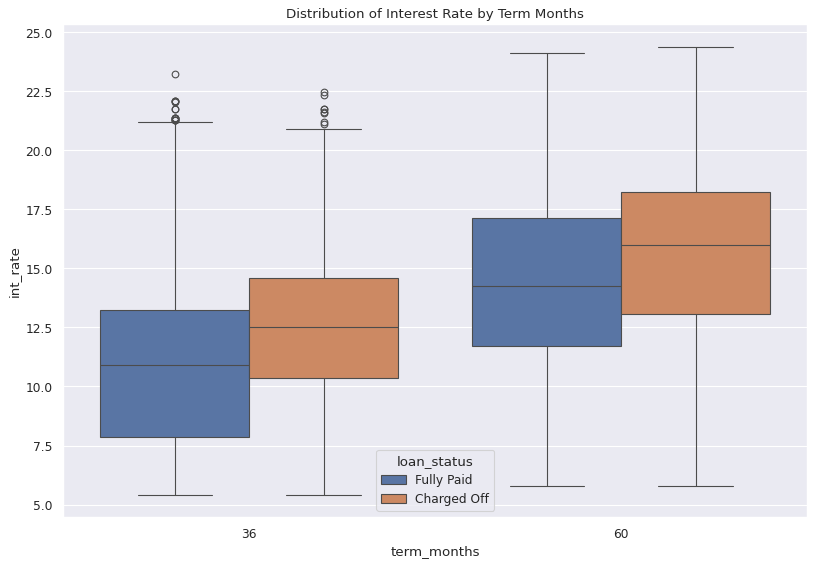

In [58]:
# Interest Rate vs Term Months by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="term_months", y='int_rate', hue='loan_status',  data=loan)
plt.title('Distribution of Interest Rate by Term Months')
plt.show()

Observations:

1) It is evident that 60 months term loans have more interest rate.

2) There are more defaulters in both 36, 60 month terms because of high interest rates.



# DTI Bivariate Distribution Plots


Observations:

1) DTI is less in lower segment, as the annual income is less and they might not have any loans and hence less DTI. If we have age details then we can predict more with borrower’s age, income and employment length.

2) DTI is high in lower middle and middle segments.

3) DTI is less in upper middle and upper segments, as the income is high they might have financial freedom. Note that there are some borrower’s in upper segment who have DTI more than 25.

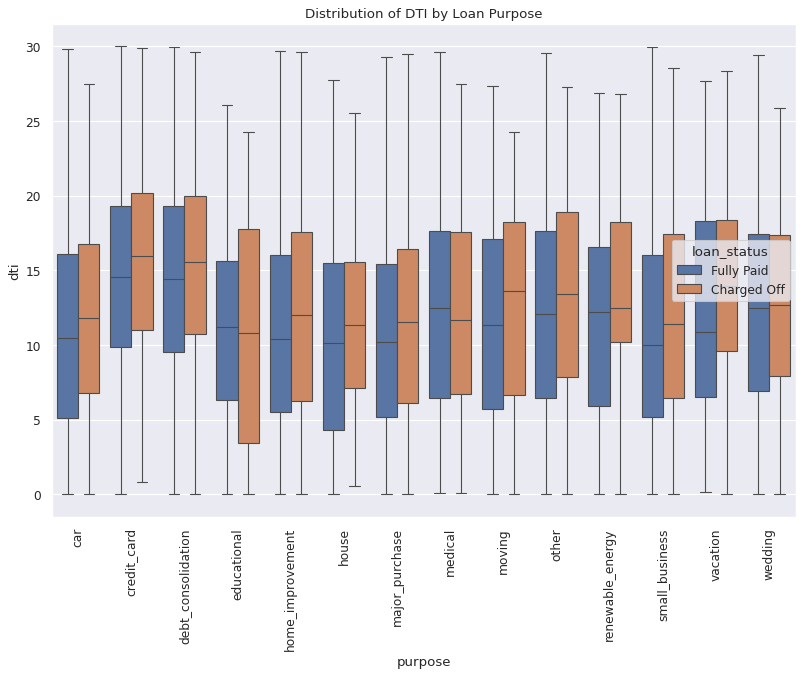

In [59]:
# DTI vs Loan Purpose by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="purpose", y='dti', hue='loan_status', data=loan, order=np.sort(loan['purpose'].unique()))
plt.title('Distribution of DTI by Loan Purpose')
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

Observations:
Almost in all categories of purpose, defaulter's DTI is high than fully paid borrowers.



# Loan Defaulters Analysis



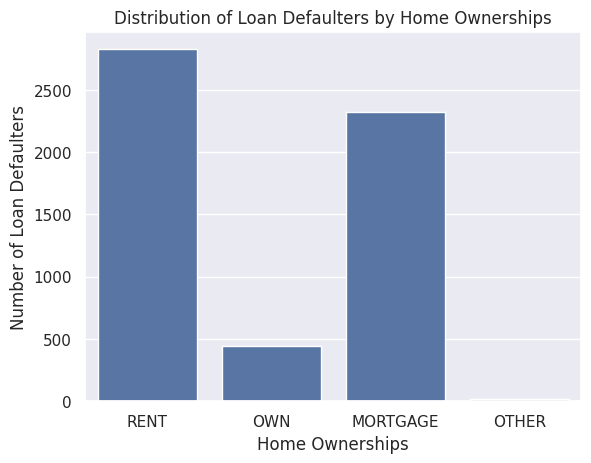

home_ownership
MORTGAGE    2325
OTHER         18
OWN          441
RENT        2827
Name: home_ownership, dtype: int64


In [60]:
# Distribution of Loan Defaulters by Home Ownerships
sns.countplot(x='home_ownership',  data=loan[loan['loan_status']=='Charged Off'])
plt.title('Distribution of Loan Defaulters by Home Ownerships')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['home_ownership'])['home_ownership'].count())

Observation: It shows there are more defaulters in RENT and MORTGAGE. let's check it in granular level.

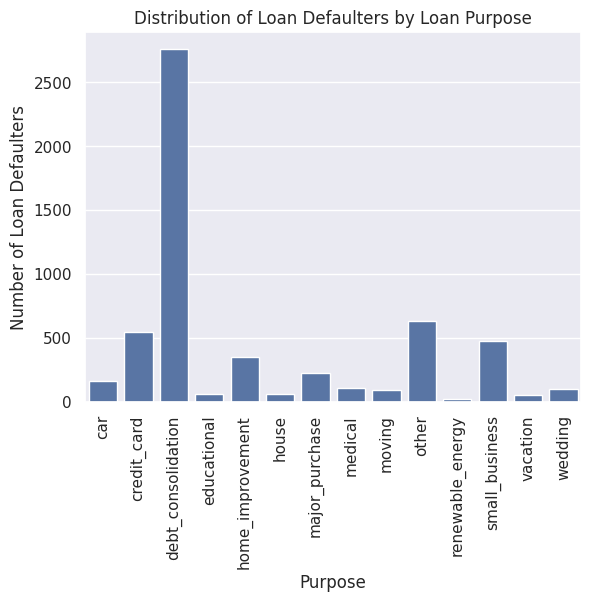

purpose
car                    160
credit_card            542
debt_consolidation    2757
educational             56
home_improvement       345
house                   59
major_purchase         222
medical                106
moving                  92
other                  632
renewable_energy        19
small_business         473
vacation                53
wedding                 95
Name: purpose, dtype: int64


In [61]:
#Distribution of Loan Defaulters by Loan Purpose
sns.countplot(x='purpose',  data=loan[loan['loan_status']=='Charged Off'], order=np.sort(loan['purpose'].unique()))
plt.title('Distribution of Loan Defaulters by Loan Purpose')
plt.xlabel("Purpose")
plt.ylabel("Number of Loan Defaulters")
# To rotate axis text
plt.xticks(rotation=90)
plt.show()


print (loan[loan['loan_status']=='Charged Off'].groupby(['purpose'])['purpose'].count())

Observation:

1) There are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'. Let's check this at granular level by combining with Home Ownership and by each Grade.

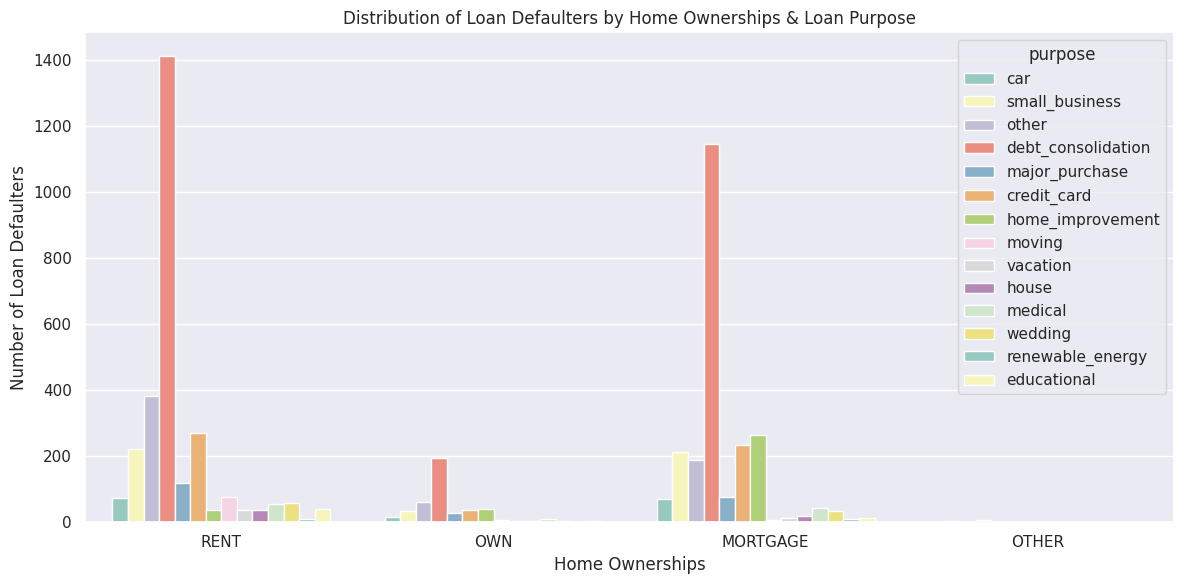

home_ownership  purpose           
MORTGAGE        car                     70
                credit_card            234
                debt_consolidation    1145
                educational             12
                home_improvement       265
                house                   19
                major_purchase          75
                medical                 42
                moving                   8
                other                  187
                renewable_energy         9
                small_business         213
                vacation                13
                wedding                 33
OTHER           car                      1
                credit_card              2
                debt_consolidation       7
                home_improvement         1
                moving                   1
                other                    2
                small_business           4
OWN             car                     15
                cre

In [62]:
# Distribution of Loan Defaulters by Home Ownerships & Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(x='home_ownership', hue='purpose', data=loan[loan['loan_status']=='Charged Off'], palette="Set3")

plt.title('Distribution of Loan Defaulters by Home Ownerships & Loan Purpose')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['home_ownership','purpose'])['home_ownership'].count())

Observation:

1) From RENT category, there are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'.

2) From MORTGAGE category, there are more defaulters from 'debt_consolidation','home_improvement', 'credit_card' and 'small_business'.

Overall, one should be carefull with 'debt_consolidation', 'credit_card' and 'small_business' loans when the borrowers dont have own house.

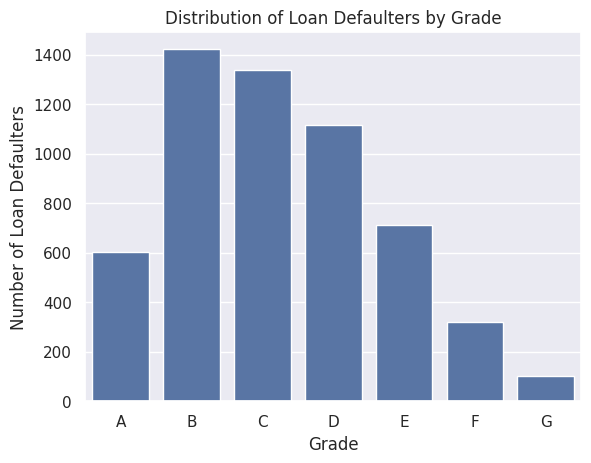

grade
A     602
B    1422
C    1339
D    1116
E     712
F     319
G     101
Name: grade, dtype: int64


In [63]:
#Distribution of Loan Defaulters by Grade
sns.countplot(x='grade',  data=loan[loan['loan_status']=='Charged Off'], order=np.sort(loan['grade'].unique()))
plt.title('Distribution of Loan Defaulters by Grade')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['grade'])['grade'].count())

Observation:

1) It shows there are more defaulters in B,C and D grades.

2) Grades F,G(more intereste rate grades) are having less defaulters which is a good indicator.

Let's check it in granular level.

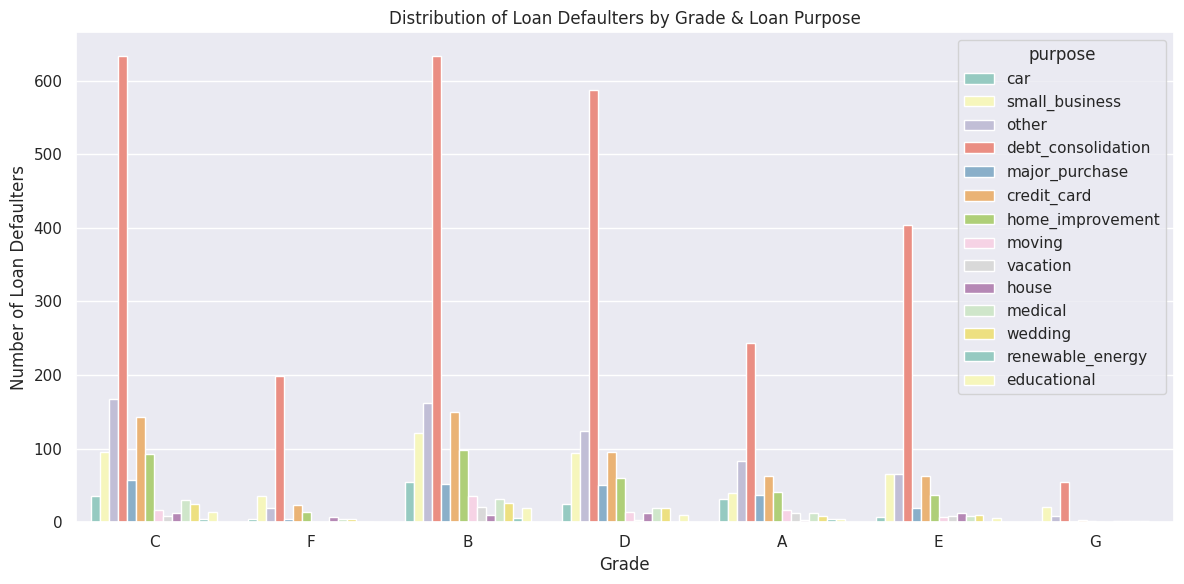

grade  purpose           
A      car                    32
       credit_card            63
       debt_consolidation    243
       educational             5
       home_improvement       41
                            ... 
G      moving                  1
       other                   9
       renewable_energy        2
       small_business         21
       wedding                 2
Name: grade, Length: 93, dtype: int64


In [64]:
# Distribution of Loan Defaulters by Grade & Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(x='grade', hue='purpose', data=loan[loan['loan_status']=='Charged Off'], palette="Set3")

plt.title('Distribution of Loan Defaulters by Grade & Loan Purpose')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['grade','purpose'])['grade'].count())

Observation:

1) From all grades, there are more defaulters from 'debt_consolidation', 'others', 'credit_card' and 'small_business' purpose loans.

# Summary of Bivariate Observations:


# Bivariate Analysis on Continuous Variables:

#Correlation Plot:

a) There were no highly negative correlation between numerical columns.

b) 0.45 correlation between term_months and interest rate(int_rate).

c) 0.47 correlation between revol_util and interest rate(int_rate).

d) No much correlation between Annual Income, DTI with other numerical columns.



#ROI vs Interest rates and Annual income:

a) There was a positive correlation between interest rates and ROI for borrowers who paid their loans, but for those who didn’t pay the ROI was negative and it shows no correlation with interest rates.                                                        
b) Borrowers with higher income has positive ROI while borrowers with lower income has negative ROI.

#Annual Income Vs Interest Rate by each grade:

By charts, it is evident that the interest rate range changes from one grade to other, and also there are few borrowers with near 6% falling in B,C,D and E grade's.

#Annual Income Vs DTI distribution by each grade:

By charts, it shows there is no DTI range constraint from one grade to other similar to interest rate which we have seen above.


# Bivariate Analysis on Categorical Variables:

#ROI Bivariate Distribution plots:

1) ROI vs Grade by loan_status: From fully_paid loan, grades E,F,G have high mean ROI, this is because of high interest rates.

2) ROI vs Loan Purpose by loan_status:
a) From fully_paid loans, almost all categories have nearby mean ROI.
b) From Charged_off loan, small_business, other and medical have low mean ROI.

3) ROI vs Home Ownership by loan_status: From Charged_off loans, Rent and Mortgage have low mean ROI.

4) ROI vs Income Segment by loan_status:
a) From fully_paid loans, ROI is bit high for upper middle and upper Income_segment.
b) From Charged_off loan, ROI is very low for lower Income_segment.

#Interest Rate Bivariate Distribution Plots:

1) Interest Rate vs Term Months by loan_status:
a) It is evident that 60 months term loans have more interest rate.
b) There are more defaulters in both 36, 60 month terms because of high interest rates.

2) Interest Rate vs Income Segment by loan_status:
a) By charts, it shows that, at every income segment, the defaulters are due to high interest rates.

#DTI Bivariate Distribution Plots:

1) DTI vs Income Segment by loan_status:
a) DTI is less in lower segment, as the annual income is less and they might not have any loans and hence less DTI. If we have age details then we can predict more with borrower’s age, income and employment length.
b) DTI is high in lower middle and middle segments.
c) DTI is less in upper middle and upper segments, as the income is high they might have financial freedom. Note that there are some borrower’s in upper segment who have DTI more than 25.

# Loan Defaulters Analysis:

1) Distribution of Loan Defaulters by Loan Purpose:
a) There are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'. Let's check this at granular level by combining with Home Ownership and by each Grade.

2) Distribution of Loan Defaulters by Home Ownerships:
a) By charts, it shows there are more defaulters in RENT and MORTGAGE.

3) Distribution of Loan Defaulters by Home Ownerships & Loan Purpose:
a) There are more defaulters with 'debt_consolidation', 'credit_card' and 'small_business' purpose from Rent, Mortgage category and hence, should be carefull when borrowers don't have own house.

4) Distribution of Loan Defaulters by Grade:
a) By charts, it shows there are more defaulters in B,C and D grades.
b) Grades F,G(more intereste rate grades) are having less defaulters which is a good indicator.

5) Distribution of Loan Defaulters by Grade & Loan Purpose:
By charts, from all grades, there are more defaulters from 'debt_consolidation', 'others', 'credit_card' and 'small_business' purpose loans.

# Conclusion:

1) Number of loans issued increased steadily by every year with a slight decrease in 2008.

2) Of settled loans, 83% were Fully Paid and 14% were Charged Off.

3) Borrowers with own house and the purpose of loan with consolidate debt, 'credit_card' and 'small_business' are not at much risk, but borrower with rent,mortgage are high risk applicants.

4) Majority of loans were from A, B, and C grade.

5) There is an inverse relationship between interest rate and loan grade - lower grades(E,F,G) have higher interest rate.

6) From ROI analysis, it shows that borrowers with the best credit profiles or the lowest loan amounts will not end up being the most profitable and the borrowers who seemed to have worst credit indicators ended up being more profitable from E,F,G grades.

7) Overall, there are more defaulters from 'debt_consolidation', 'others', 'credit_card' and 'small_business' purpose loans from all grades.